In [1]:
#Veri Seti İncelemesi
from sklearn.datasets import load_breast_cancer


In [2]:
cancer = load_breast_cancer()

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

In [5]:
X = cancer.data  #features
y = cancer.target  #target

#train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

#ölceklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3) #Model oluşturma 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
#test
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Doğruluk", accuracy)

Doğruluk 0.9590643274853801


In [7]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 59   4]
 [  3 105]]


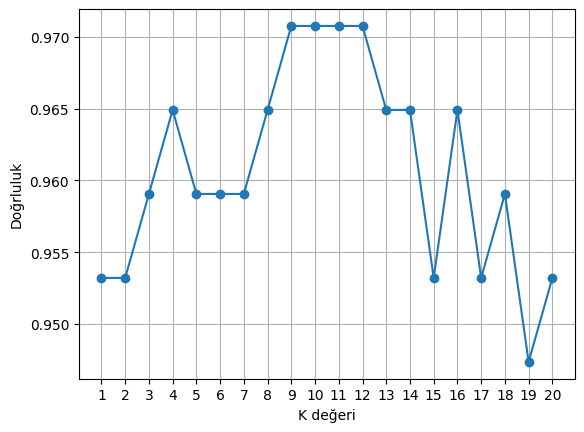

In [8]:
#Hiperparametre ayarlaması
accuracy_values = []
k_values = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)
plt.figure()
plt.plot(k_values, accuracy_values, marker = "o" , linestyle = "-")
plt.xlabel("K değeri")
plt.ylabel("Doğrluluk")
plt.xticks(k_values)
plt.grid(True)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

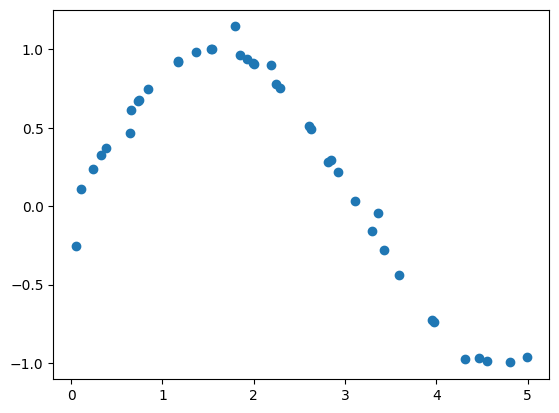

In [10]:
X = np.sort(5 * np.random.rand(40,1),axis=0) #features
y = np.sin(X).ravel() #target
#add noise
y[::5] +=1 * (0.5 - np.random.rand(8))

T = np.linspace(0,5,500)[:,np.newaxis]

plt.scatter(X , y)

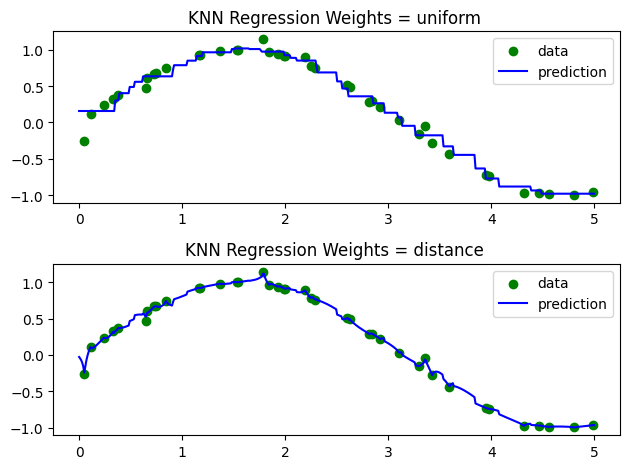

In [11]:
for i, weight in enumerate(["uniform" , "distance"]):
    knn = KNeighborsRegressor(n_neighbors=5,weights=weight)
    y_pred = knn.fit(X,y).predict(T)
    plt.subplot(2,1,i+1)
    plt.scatter(X,y,color = "green", label = "data")
    plt.plot(T,y_pred, color = "blue", label = "prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNN Regression Weights = {} ".format(weight))

plt.tight_layout()
plt.show()
